# Imports

In [203]:
import pickle 

import numpy as np
import matplotlib.pyplot as plt
from scipy.special import expit  # sigmoid

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron, SGDClassifier

# Perceptron

In [2]:
X = np.array([1, 2])
W = np.array([0.1, 0.2])

In [3]:
X * W 

array([0.1, 0.4])

In [4]:
np.sum(X * W)

0.5

In [5]:
np.dot(X, W)

0.5

In [6]:
X @ W

0.5

In [7]:
X.dot(W)

0.5

## AND Gate

| $X_1$ | $X_2$ | $y$ |
|---|---|---|
|0|0|0|
|0|1|0|
|1|0|0|
|1|1|1|

In [8]:
def and_gate(x1, x2): 
    w1, w2, th = 0.5, 0.5, 0.7 
    result = x1 * w1 + x2 * w2 
    if result > th: 
        y = 1
    else: 
        y = 0 

    return y 

In [9]:
and_gate(x1=0, x2=0)

0

In [10]:
and_gate(x1=0, x2=1)

0

In [11]:
and_gate(x1=1, x2=0)

0

In [12]:
and_gate(x1=1, x2=1)

1

In [13]:
def and_gate2(x1, x2):
    w1, w2, th = 0.1, 0.1, 0.1 
    result = x1 * w1 + x2 * w2 
    y = 1 if result > th else 0 
    return y 

In [14]:
and_gate2(1, 1)

1

AND 게이트를 만들 수 있는 가중치(w1, w2), 임계값(threshhold)은 무수히 많은 조합이 있을 수 있음

In [15]:
def and_gate3(x):
    """x는 원소가 2개인 1차원 배열. AND 논리 연산의 결과를 리턴"""
    w = np.array([0.5, 0.5])
    th = 0.7
    # y = 1 if np.sum(x * w) > th else 0 
    y = 1 if np.dot(x, w) > th else 0 
    return y 

In [16]:
and_gate3(np.array([0.5, 0.5]))

0

In [17]:
def and_gate4(X):
    """X는 컬럼이 2개인 2차원 배열. 즉 shape은 (-1, 2). AND 논리 연산 결과를 리턴"""
    w = np.array([0.5, 0.5])  # 가중치(weight)
    th = 0.7
    y = (np.dot(X, w) > th).astype(np.int_)
    return y 

In [18]:
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])

In [19]:
and_gate4(X)

array([0, 0, 0, 1])

In [20]:
def and_gate5(X):
    w = np.array([0.5, 0.5])  # 가중치 
    b = -0.7  # 편향 
    result = np.dot(X, w) + b # Linear equation 
    y = result > 0 
    return y.astype(np.int_)

In [21]:
and_gate5(X)

array([0, 0, 0, 1])

In [22]:
def and_gate6(X):
    w_bias = np.array([-0.7, 0.5, 0.5])  # bias를 포함한 weights: (bias, w1, w2)
    n = len(X)
    X_bias = np.c_[np.ones(n), X]
    result = np.dot(X_bias, w_bias)  # X_bias @ w_bias
    y = result > 0
    return y.astype(np.int_)

In [23]:
and_gate6(X)

array([0, 0, 0, 1])

## NAND Gate

| $X_1$ | $X_2$ | $y$ |
|---|---|---|
|0|0|1|
|0|1|1|
|1|0|1|
|1|1|0|

In [24]:
def nand_gate(X):
    w_bias = np.array([-0.7, 0.5, 0.5])  
    n = len(X)
    X_bias = np.c_[np.ones(n), X]
    result = np.dot(X_bias, w_bias)  
    y = (result <= 0)
    return y.astype(np.int_)

In [25]:
nand_gate(X[0:1])

array([1])

## OR Gate

| $X_1$ | $X_2$ | $y$ |
|---|---|---|
|0|0|0|
|0|1|1|
|1|0|1|
|1|1|1|

In [26]:
def or_gate(X):
    w_bias = np.array([-0.5, 1, 1])  
    n = len(X)
    X_bias = np.c_[np.ones(n), X]
    y = np.dot(X_bias, w_bias) > 0
    return y.astype(np.int_)

In [27]:
or_gate(X)

array([0, 1, 1, 1])

## XOR(Exclusive OR) Gate

| $X_1$ | $X_2$ |NAND($y_1$)| OR($y_2$) |z($y_1$ AND $y_2$)|
|---|---|---|---|---|
|0|0|1|0|0|
|0|1|1|1|1|
|1|0|1|1|1|
|1|1|0|1|0|

In [28]:
def xor_gate(X):
    y1 = nand_gate(X)  # perceptron, neuron
    y2 = or_gate(X)
    Y = np.c_[y1, y2]  # layer
    z = and_gate6(Y)
    return z

In [29]:
xor_gate(X)

array([0, 1, 1, 0])

# Activation Function(활성화 함수) 

활성화 함수를 사용하는 이유:

1. 출력층에서 출력값을 특정 값(예: 0, 1) 또는 특정 값의 범위(예: 0 ~ 1)로 제한하기 위해서
2. 여러 층을 쌓는 다층 신경망(multi-layer neural network, deep neural network)에서 활성화 함수를 사용하지 않으면 단일 신경망과 동일해지기 때문에 

## Step function(계단 함수)

In [33]:
def step(x): 
    # y = 1 if x > 0 else 0
    y = x > 0

    return y.astype(np.int_) 

In [36]:
x = np.arange(-5, 5, 0.001)
y = step(x)

In [37]:
print(x[:10])
print(y[:10])

[-5.    -4.999 -4.998 -4.997 -4.996 -4.995 -4.994 -4.993 -4.992 -4.991]
[0 0 0 0 0 0 0 0 0 0]


In [38]:
print(x[-10:])
print(y[-10:])

[4.99  4.991 4.992 4.993 4.994 4.995 4.996 4.997 4.998 4.999]
[1 1 1 1 1 1 1 1 1 1]


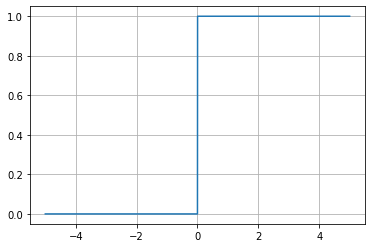

In [39]:
plt.plot(x, y)
plt.grid()
plt.show()

In [48]:
def plot_activation_fn(activation):
    """활성화 함수 activation을 파라미터로 전달받아서, 시각화하는 함수"""
    x = np.arange(-5, 5, 0.0001)  # 그래프를 그릴 x 좌표들
    y = activation(x)     # activation 함수의 리턴값(출력값) 
    plt.plot(x, y)
    plt.grid()
    plt.show()

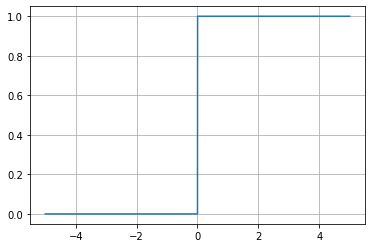

In [49]:
plot_activation_fn(activation=step)

## Sigmoid 함수

In [52]:
def sigmoid(x):
    y = 1 / (1 + np.exp(-x))
    return y

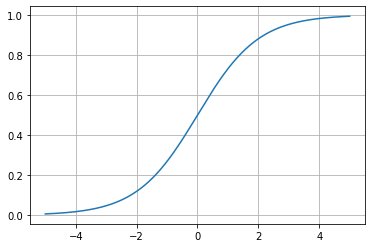

In [53]:
plot_activation_fn(sigmoid)

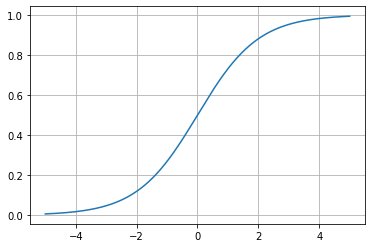

In [58]:
plot_activation_fn(expit)

## tanh(Hyperbolic tangent)

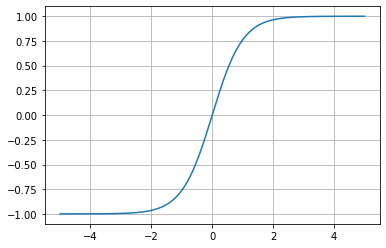

In [59]:
plot_activation_fn(np.tanh)

## ReLu(Rectified Linear Unit) 함수

In [61]:
def relu(x):
    y = np.maximum(x, 0)
    return y

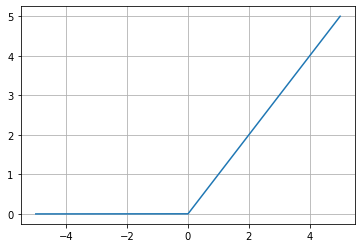

In [62]:
plot_activation_fn(relu)

# Artificial neuron(인공 뉴런) 응용

In [88]:
X, y = load_iris(return_X_y=True)

In [89]:
X.shape  #> (n_sample, n_features)

(150, 4)

In [90]:
y.shape  #> (n_samples)

(150,)

In [91]:
X[:5]   #> sepal-length, sepal-width, petal-length, petal-width

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [92]:
y[:5]

array([0, 0, 0, 0, 0])

In [93]:
np.unique(y, return_counts=True)  #> 0: setosa, 1: versicolor, 2: virginica

(array([0, 1, 2]), array([50, 50, 50]))

문제를 간단히 하기 위해서, 

* iris의 특성들 중에서 꽃잎 길이/너비만 선택
* setosa(0)/non-setosa(1) 이진 분류

In [94]:
data = X[:, 2:4]
data[:5]

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2]])

In [95]:
target = (y != 0).astype(np.int_)
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

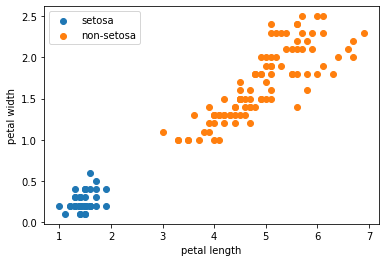

In [96]:
plt.scatter(data[target== 0, 0], data[target == 0, 1], label='setosa')
plt.scatter(data[target== 1, 0], data[target == 1, 1], label='non-setosa')

plt.legend()
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.show()

In [97]:
b = -2.0  # bias
w = np.array([0.7, 1.2])  # weight 

In [98]:
z = np.dot(data, w) + b
z

array([-0.78, -0.78, -0.85, -0.71, -0.78, -0.33, -0.66, -0.71, -0.78,
       -0.83, -0.71, -0.64, -0.9 , -1.11, -0.92, -0.47, -0.61, -0.66,
       -0.45, -0.59, -0.57, -0.47, -1.06, -0.21, -0.43, -0.64, -0.4 ,
       -0.71, -0.78, -0.64, -0.64, -0.47, -0.83, -0.78, -0.71, -0.92,
       -0.85, -0.9 , -0.85, -0.71, -0.73, -0.73, -0.85, -0.16, -0.19,
       -0.66, -0.64, -0.78, -0.71, -0.78,  2.97,  2.95,  3.23,  2.36,
        3.02,  2.71,  3.21,  1.51,  2.78,  2.41,  1.65,  2.74,  2.  ,
        2.97,  2.08,  2.76,  2.95,  2.07,  2.95,  2.05,  3.52,  2.36,
        3.23,  2.73,  2.57,  2.76,  3.04,  3.54,  2.95,  1.65,  1.98,
        1.79,  2.17,  3.49,  2.95,  3.07,  3.09,  2.64,  2.43,  2.36,
        2.52,  2.9 ,  2.24,  1.51,  2.5 ,  2.38,  2.5 ,  2.57,  1.42,
        2.43,  5.2 ,  3.85,  4.65,  4.08,  4.7 ,  5.14,  3.19,  4.57,
        4.22,  5.27,  3.97,  3.99,  4.37,  3.9 ,  4.45,  4.47,  4.01,
        5.33,  5.59,  3.3 ,  4.75,  3.83,  5.09,  3.59,  4.51,  4.36,
        3.52,  3.59,

In [99]:
predictions = step(z)
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [103]:
np.mean(target == predictions)

1.0

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [133]:
class SimplePerceptron:
    def fit(self, X, y):
        self.intercept_ = np.array([-2.0])  # bias
        self.coef_ = np.array([0.7, 1.2])   # weights 

    def forward(self, X):
        z = np.dot(X, self.coef_) + self.intercept_
        return z 

    def activation(self, x):  # step function 
        y = x > 0
        return y.astype(np.int_)

    def predict(self, X):     # 이 하나가 뉴런 하나 이다
        z = self.forward(X)
        y = self.activation(z)
        return y 

    def score(self, X, y):
        y_pred = self.predict(X)
        acc = np.mean(y == y_pred)
        return acc
    

In [134]:
neuron = SimplePerceptron()  # 뉴런 객체 생성 

In [135]:
neuron.fit(data, target)   # 모델 훈련 

In [136]:
neuron.intercept_, neuron.coef_  # 모델 훈련 후 선형 방정식의 계수들을 찾을 수 있음 

(array([-2.]), array([0.7, 1.2]))

In [137]:
neuron.forward(data)

array([-0.78, -0.78, -0.85, -0.71, -0.78, -0.33, -0.66, -0.71, -0.78,
       -0.83, -0.71, -0.64, -0.9 , -1.11, -0.92, -0.47, -0.61, -0.66,
       -0.45, -0.59, -0.57, -0.47, -1.06, -0.21, -0.43, -0.64, -0.4 ,
       -0.71, -0.78, -0.64, -0.64, -0.47, -0.83, -0.78, -0.71, -0.92,
       -0.85, -0.9 , -0.85, -0.71, -0.73, -0.73, -0.85, -0.16, -0.19,
       -0.66, -0.64, -0.78, -0.71, -0.78,  2.97,  2.95,  3.23,  2.36,
        3.02,  2.71,  3.21,  1.51,  2.78,  2.41,  1.65,  2.74,  2.  ,
        2.97,  2.08,  2.76,  2.95,  2.07,  2.95,  2.05,  3.52,  2.36,
        3.23,  2.73,  2.57,  2.76,  3.04,  3.54,  2.95,  1.65,  1.98,
        1.79,  2.17,  3.49,  2.95,  3.07,  3.09,  2.64,  2.43,  2.36,
        2.52,  2.9 ,  2.24,  1.51,  2.5 ,  2.38,  2.5 ,  2.57,  1.42,
        2.43,  5.2 ,  3.85,  4.65,  4.08,  4.7 ,  5.14,  3.19,  4.57,
        4.22,  5.27,  3.97,  3.99,  4.37,  3.9 ,  4.45,  4.47,  4.01,
        5.33,  5.59,  3.3 ,  4.75,  3.83,  5.09,  3.59,  4.51,  4.36,
        3.52,  3.59,

In [138]:
neuron.predict(data)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [139]:
neuron.score(data, target)

1.0

## sklearn.linear_model.Perceptron 

In [143]:
perceptron = Perceptron(random_state=42)  # 모델 생성

In [144]:
perceptron.fit(X=data, y=target)  # 모델 훈련 

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=42, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [145]:
perceptron.intercept_, perceptron.coef_

(array([-4.]), array([[1.4, 2.2]]))

In [146]:
perceptron.predict(data)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [147]:
perceptron.score(data, target)

1.0

## 활성화 함수가 sigmoid 인 Neuron

In [187]:
class SimpleNeuron:
    def fit(self, X, y): 
        self.intercept_ = np.array([-35.6])
        self.coef_ = np.array([11.8, 17.0])

    def forward(self, X): 
        z = np.dot(X, self.coef_) + self.intercept_
        return z 

    def activation(self, x):          
        y = expit(x)   # sigmoid 함수 리턴값 
        return y 

    def predict_proba(self, X):
        z = self.forward(X)  # 선형 방정식
        y = self.activation(z)  # sigmoid 활성화
        probas = np.c_[1 - y, y]  # [0(setosa)이 될 확률, 1(non-setosa)이 될 확률]
        return probas 

    def predict(self, X): 
        probas = self.predict_proba(X)
        preds = np.argmax(probas, axis=1)
        return preds

    def score(self, X, y):
        preds = self.predict(X)
        acc = np.mean(y == preds)
        return acc

In [188]:
neuron = SimpleNeuron()
neuron.fit(data, target)
neuron.intercept_, neuron.coef_

(array([-35.6]), array([11.8, 17. ]))

In [189]:
z = neuron.forward(data)
y = neuron.activation(z) 
y   # 타겟이 1(non-setosa)가 될 확률 

array([1.54975290e-07, 1.54975290e-07, 4.76206166e-08, 5.04347408e-07,
       1.54975290e-07, 1.60028275e-04, 8.48325994e-07, 5.04347408e-07,
       1.54975290e-07, 9.21359999e-08, 5.04347408e-07, 1.64133333e-06,
       2.83114356e-08, 8.21408964e-10, 1.46328035e-08, 1.51120954e-05,
       1.42690695e-06, 8.48325994e-07, 2.92383534e-05, 2.76076495e-06,
       5.34149308e-06, 1.51120954e-05, 1.38163259e-09, 8.75359636e-04,
       5.65685959e-05, 1.64133333e-06, 4.91787381e-05, 5.04347408e-07,
       1.54975290e-07, 1.64133333e-06, 1.64133333e-06, 1.51120954e-05,
       9.21359999e-08, 1.54975290e-07, 5.04347408e-07, 1.46328035e-08,
       4.76206166e-08, 2.83114356e-08, 4.76206166e-08, 5.04347408e-07,
       2.60672694e-07, 2.60672694e-07, 4.76206166e-08, 1.47150060e-03,
       1.69225438e-03, 8.48325994e-07, 1.64133333e-06, 1.54975290e-07,
       5.04347408e-07, 1.54975290e-07, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
      

In [193]:
pred_probs = neuron.predict_proba(data)
pred_probs[:5], pred_probs[-5:]

(array([[9.99999845e-01, 1.54975290e-07],
        [9.99999845e-01, 1.54975290e-07],
        [9.99999952e-01, 4.76206166e-08],
        [9.99999496e-01, 5.04347408e-07],
        [9.99999845e-01, 1.54975290e-07]]), array([[0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.]]))

In [194]:
neuron.predict(data)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [195]:
neuron.score(data, target)

1.0

## sklearn.linear_module.SGDClassifier

In [199]:
sgd_clf = SGDClassifier(loss='log', random_state=42)  # 모델 생성 
sgd_clf.fit(data, target)  # 모델 훈련
sgd_clf.intercept_, sgd_clf.coef_

(array([-33.65502003]), array([[9.29310825, 9.5046378 ]]))

In [200]:
probas = sgd_clf.predict_proba(data)
probas[:5]

array([[9.99999993e-01, 7.23930287e-09],
       [9.99999993e-01, 7.23930287e-09],
       [9.99999997e-01, 2.85826298e-09],
       [9.99999982e-01, 1.83354387e-08],
       [9.99999993e-01, 7.23930287e-09]])

In [201]:
sgd_clf.predict(data)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [202]:
sgd_clf.score(data, target)

1.0

## 은닉층(hidden layer)이 있는 신경망

[github](https://github.com/JakeOh/202011_itw_bd21/raw/main/lab_ml/iris2_model_weights.pkl)에 있는 iris2_model_weights.pkl 파일을 다운로드 하고, colabp 폴더에 업로드

In [205]:
with open('iris2_model_weights.pkl', mode='rb') as f: 
    weights = pickle.load(f)

In [206]:
weights.keys()

dict_keys(['W1', 'b1', 'W2', 'b2'])

In [210]:
# 입력층(input layer)에서 은닉층(hidden layer)로 들어갈 때 필요한 가중치 
weights['W1'].shape  # (n_input, n_output)

(2, 10)

In [211]:
# 입력층(input layer)에서 은닉층(hidden layer)로 들어갈 때 필요한 편향
weights['b1'].shape  # n_neurons

(10,)

In [212]:
# 은닉층에서 출력층(output layer)로 들어갈 때 필요한 가중치
weights['W2'].shape

(10, 1)

In [213]:
# 은닉층에서 출력층(output layer)로 들어갈 때 필요한 편향
weights['b2'].shape

(1,)

In [233]:
# iris data가 신경망의 모든 층을 통과한 후, 계산된 결과 출력 (150, 1)
# (150, 2) @ (2, 10) = (150, 10): 첫번째 은닉층에서 가중치가 곱해지는 과정
z1 = np.dot(data, weights['W1']) +  weights['b1']
z1.shape

(150, 10)

In [235]:
# 첫번째 은닉층의 활성화 함수를 통과 
y1 = expit(z1)
y1.shape  #> 출력층으로 입력될 입력 데이터

(150, 10)

In [236]:
# 출력층에서 가중치가 곱해지는 과정 
z2 = np.dot(y1, weights['W2']) + weights['b2']
z2.shape

(150, 1)

In [237]:
# 출력층에서 활성화 함수를 통과  -> 클래스 1(non-setosa)가 될 확률
y2 = expit(z2)
y2.shape

(150, 1)

In [238]:
y2[:5]

array([[0.4881909 ],
       [0.4881909 ],
       [0.48864567],
       [0.48775497],
       [0.4881909 ]])

In [239]:
y[-5:]

array([1., 1., 1., 1., 1.])

In [241]:
probas = np.c_[1-y2, y2]  # [class=0 확률, class=1 확률]
probas[:5]

array([[0.5118091 , 0.4881909 ],
       [0.5118091 , 0.4881909 ],
       [0.51135433, 0.48864567],
       [0.51224503, 0.48775497],
       [0.5118091 , 0.4881909 ]])

In [242]:
np.argmax(probas, axis=1)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])